In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [10]:
streamcluster_ff = pd.read_csv("streamcluster/benchmark-gcc-ff.out")
streamcluster_pthreads = pd.read_csv("streamcluster/benchmark-gcc-pthreads.out")
streamcluster_openmp = pd.read_csv("streamcluster/benchmark-gcc-openmp.out")
streamcluster_tbb = pd.read_csv("streamcluster/benchmark-gcc-tbb.out")
serial_time = 392.048
serial_energy = 38829.3

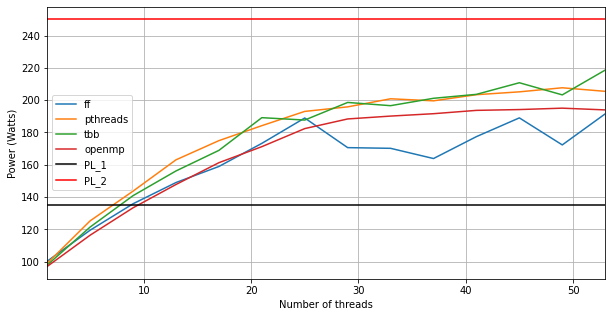

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(streamcluster_ff.Threads,streamcluster_ff.PCM_energy/ streamcluster_ff.Time,label = "ff")
plt.plot(streamcluster_pthreads.Threads,streamcluster_pthreads.PCM_energy/ streamcluster_pthreads.Time,label = "pthreads")
plt.plot(streamcluster_tbb.Threads,streamcluster_tbb.PCM_energy/ streamcluster_tbb.Time,label = "tbb")
plt.plot(streamcluster_openmp.Threads,streamcluster_openmp.PCM_energy/ streamcluster_openmp.Time,label = "openmp")
plt.axhline(y=135, color='black', linestyle='-', label="PL_1")
plt.xlim([1,53])
plt.axhline(y=250, color='r', linestyle='-', label="PL_2")
plt.xlabel("Number of threads")
plt.ylabel("Power (Watts)")
plt.grid()
plt.legend()
plt.savefig('streamcluster_power')
plt.show()

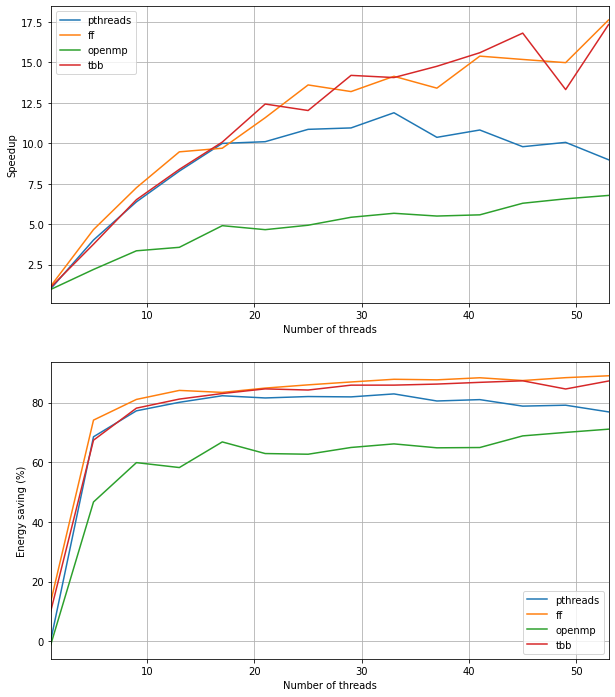

In [13]:
fig, ax = plt.subplots(2,figsize=(10, 12))

ax[0].plot(streamcluster_pthreads.Threads, serial_time / streamcluster_pthreads.Time,label = "pthreads")
ax[0].plot(streamcluster_ff.Threads, serial_time / streamcluster_ff.Time, label = "ff")
ax[0].plot(streamcluster_openmp.Threads, serial_time / streamcluster_openmp.Time, label = "openmp")
ax[0].plot(streamcluster_tbb.Threads, serial_time / streamcluster_tbb.Time, label = "tbb")
ax[0].set_xlabel("Number of threads")
ax[0].set_ylabel("Speedup")
ax[0].set_xlim([1,53])
ax[0].grid()
ax[0].legend()

ax[1].plot(streamcluster_pthreads.Threads, (serial_energy - streamcluster_pthreads.PCM_energy) / serial_energy *100,label = "pthreads")
ax[1].plot(streamcluster_ff.Threads, (serial_energy - streamcluster_ff.PCM_energy) / serial_energy *100, label = "ff")
ax[1].plot(streamcluster_openmp.Threads, (serial_energy - streamcluster_openmp.PCM_energy) / serial_energy *100, label = "openmp")
ax[1].plot(streamcluster_tbb.Threads, (serial_energy - streamcluster_tbb.PCM_energy) / serial_energy *100, label = "tbb")
ax[1].set_xlabel("Number of threads")
ax[1].set_ylabel("Energy saving (%)")
ax[1].set_xlim([1,53])
ax[1].grid()
ax[1].legend()

fig.savefig('streamcluster_overall')